In [ ]:
##  the purpose of this program is to apply machine learning algorithms to the dataset and observe the performance of algorithms.
##  the algorithms used are:Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest Neighbors
##  As the program display output data include: file name, machine learning algorithm name, accuracy,Precision, Recall, F1-score,Time
##  the program will create a CSV file that prints the results and a folder containing graphics.

In [ ]:
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = "/content/drive/MyDrive/Intrusion Detection System/"

In [ ]:
result = os.path.join(base_path, "results", "results_1.csv") #a CSV file is named in which the results are saved.
attacks_path = os.path.join(base_path, "attacks")# CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
graph_folder = os.path.join(base_path, "results", "result_graph_1")

# Get list of CSV files in the attacks folder
csv_files = os.listdir(attacks_path)

repetition=10

In [ ]:
def folder(f_name):
    # This function creates a folder if it does not exist.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

# Create results and graph folders if they don't exist
folder(os.path.join(base_path, "results"))
folder(graph_folder)

In [ ]:
#The machine learning algorithms to be used are defined in a dictionary (ml_list).
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Nearest Neighbors":KNeighborsClassifier(3)}


# the features to be used for each attack type is defined in a dictionary(features).
# the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
"DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
"DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
"DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
"DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
"DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
"FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
"Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
"Infiltration":["Fwd Packet Length Max","Fwd Packet Length Mean","Flow Duration","Total Length of Fwd Packets","Label"],
"PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
"SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
"Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"]}


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.54            0.69            0.67            0.54            0.0153         
Bot               QDA                0.67            0.74            0.77            0.67            0.0173         
Bot               Random Forest      0.96            0.94            0.95            0.95            0.0546         
Bot               ID3                0.94            0.92            0.96            0.94            0.0209         
Bot               AdaBoost           0.96            0.94            0.97            0.96            0.2796         
Bot               MLP                0.68            0.59            0.56            0.56            0.4796         
Bot               Nearest Neighbors  0.95            0.93            0.95            0.94            0.2121         


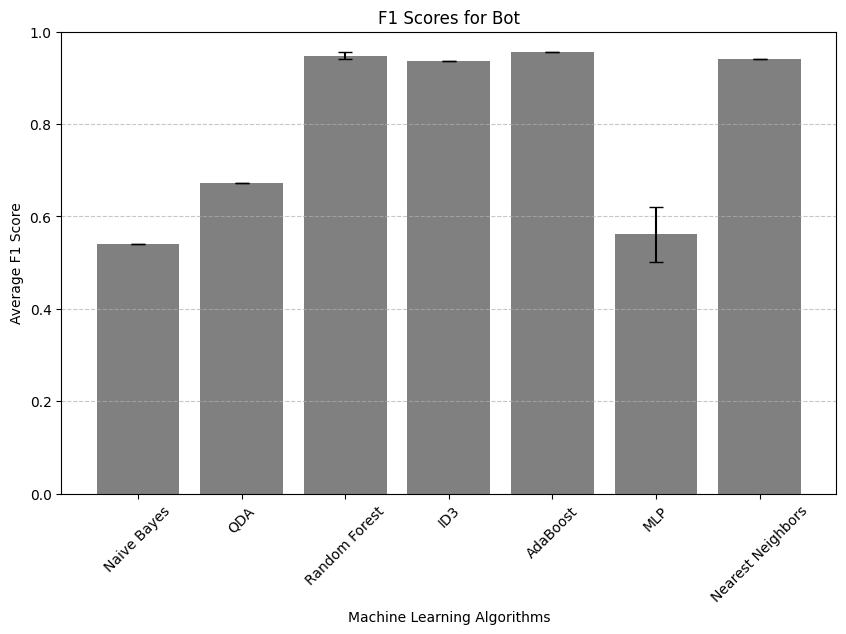


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.78            0.74            0.69            0.71            0.0659         
DDoS              QDA                0.42            0.67            0.58            0.4             0.104          
DDoS              Random Forest      0.96            0.95            0.97            0.96            0.7408         
DDoS              ID3                0.96            0.95            0.96            0.96            0.4004         
DDoS              AdaBoost           0.96            0.94            0.96            0.95            3.3564         
DDoS              MLP                0.73            0.67            0.59            0.53            28.0858        
DDoS              Nearest Neighbors  0.93            0.91            0.92  

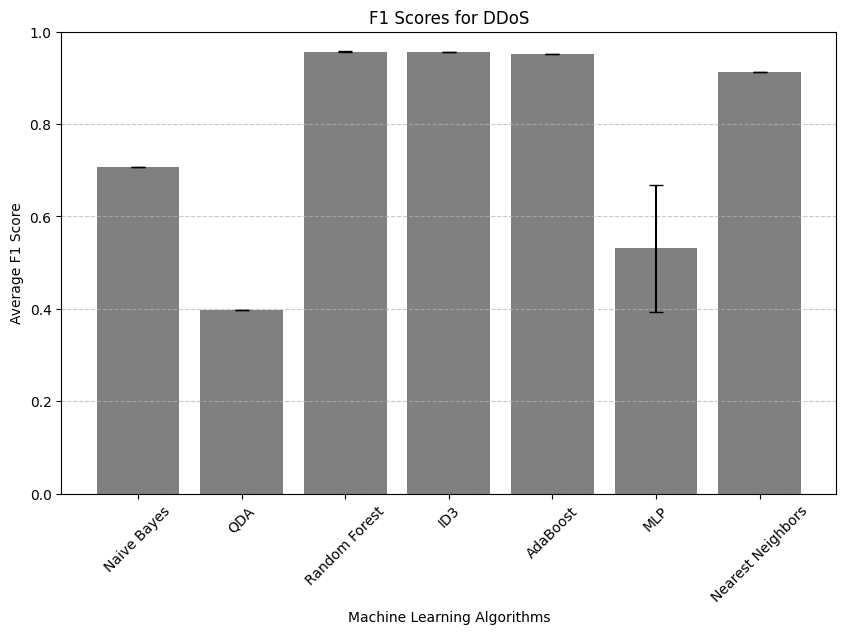


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.83            0.82            0.74            0.77            0.0262         
DoS GoldenEye     QDA                0.94            0.93            0.94            0.93            0.0414         
DoS GoldenEye     Random Forest      0.99            0.99            0.99            0.99            0.1481         
DoS GoldenEye     ID3                0.99            0.99            0.99            0.99            0.0615         
DoS GoldenEye     AdaBoost           0.98            0.98            0.98            0.98            0.8918         
DoS GoldenEye     MLP                0.73            0.7             0.69            0.66            5.4158         
DoS GoldenEye     Nearest Neighbors  0.98            0.97            0.98  

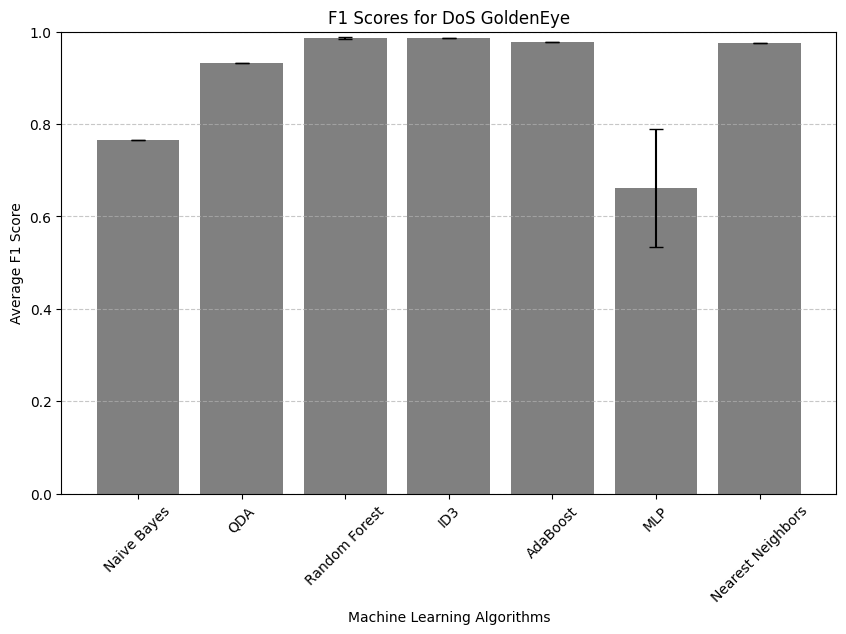


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.34            0.65            0.54            0.31            0.3478         
DoS Hulk          QDA                0.41            0.66            0.59            0.4             0.7566         
DoS Hulk          Random Forest      0.93            0.94            0.88            0.9             3.6815         
DoS Hulk          ID3                0.96            0.95            0.96            0.95            1.2818         
DoS Hulk          AdaBoost           0.95            0.94            0.93            0.94            17.0147        
DoS Hulk          MLP                0.95            0.94            0.94            0.94            65.4242        
DoS Hulk          Nearest Neighbors  0.96            0.95            0.96  

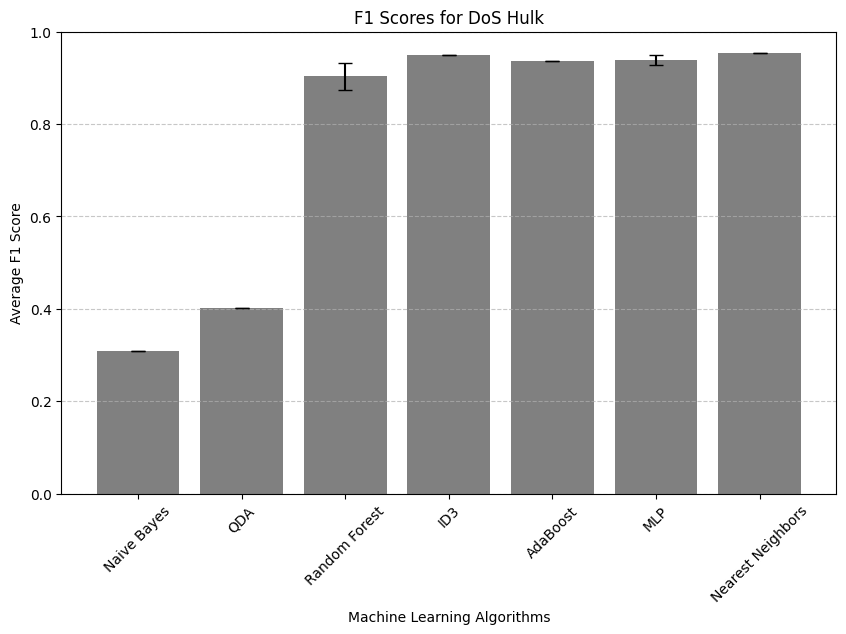


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.4             0.6             0.56            0.39            0.0299         
DoS Slowhttptest  QDA                0.63            0.68            0.71            0.63            0.0322         
DoS Slowhttptest  Random Forest      0.98            0.99            0.98            0.98            0.0916         
DoS Slowhttptest  ID3                0.98            0.99            0.97            0.98            0.0395         
DoS Slowhttptest  AdaBoost           0.98            0.98            0.97            0.97            0.4374         
DoS Slowhttptest  MLP                0.78            0.8             0.78            0.72            2.5532         
DoS Slowhttptest  Nearest Neighbors  0.99            0.98            0.99  

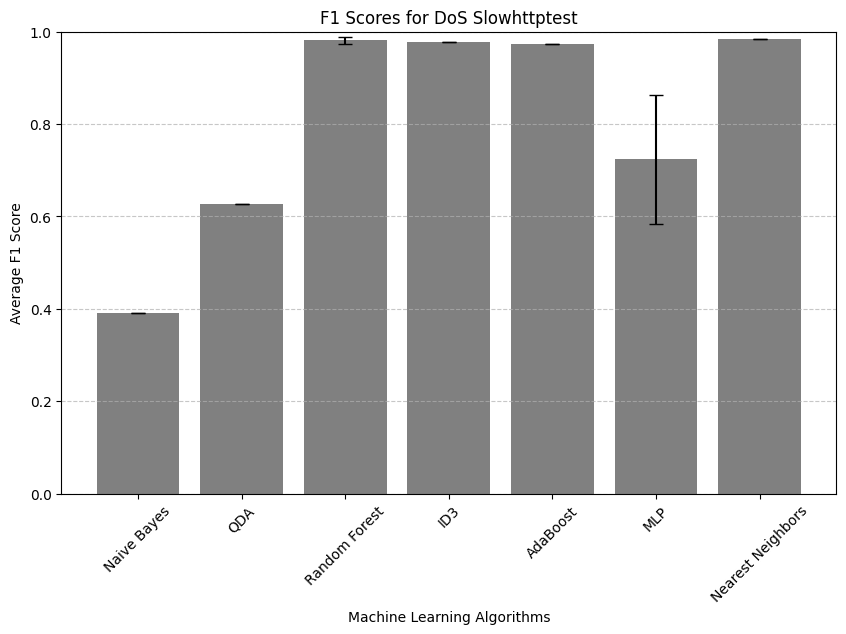


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.43            0.67            0.59            0.42            0.0195         
DoS slowloris     QDA                0.5             0.67            0.63            0.49            0.0208         
DoS slowloris     Random Forest      0.95            0.94            0.94            0.94            0.1004         
DoS slowloris     ID3                0.97            0.98            0.95            0.96            0.0531         
DoS slowloris     AdaBoost           0.94            0.93            0.91            0.92            0.5643         
DoS slowloris     MLP                0.81            0.79            0.79            0.75            2.8483         
DoS slowloris     Nearest Neighbors  0.96            0.95            0.95  

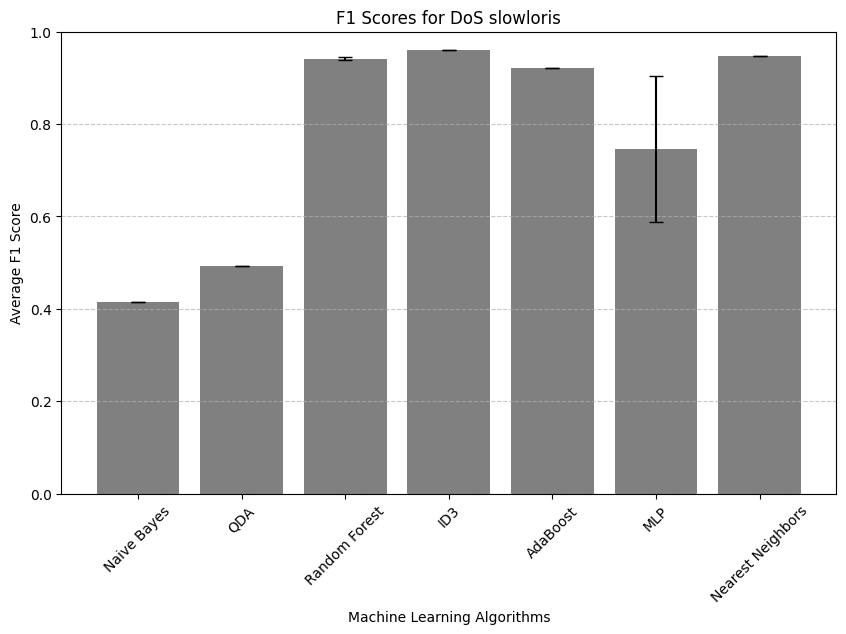


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        1.0             1.0             1.0             1.0             0.0219         
FTP-Patator       QDA                1.0             1.0             1.0             1.0             0.0233         
FTP-Patator       Random Forest      1.0             1.0             1.0             1.0             0.1075         
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.048          
FTP-Patator       AdaBoost           1.0             1.0             1.0             1.0             0.5772         
FTP-Patator       MLP                1.0             1.0             1.0             1.0             5.7361         
FTP-Patator       Nearest Neighbors  1.0             1.0             1.0   

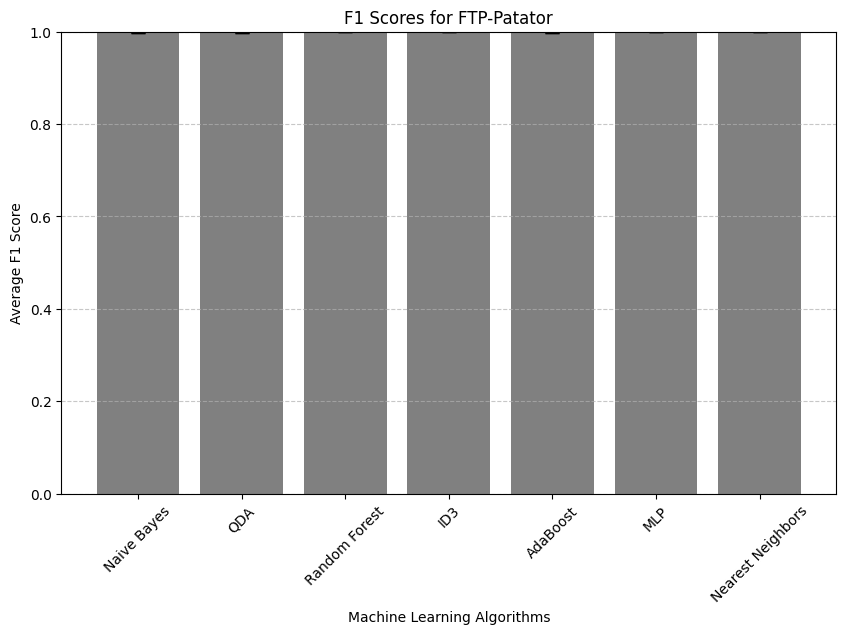


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0188         
Heartbleed        QDA                1.0             1.0             1.0             1.0             0.0208         
Heartbleed        Random Forest      1.0             1.0             1.0             1.0             0.0439         
Heartbleed        ID3                1.0             1.0             1.0             1.0             0.0187         
Heartbleed        AdaBoost           1.0             1.0             1.0             1.0             0.0207         
Heartbleed        MLP                0.78            0.7             0.79            0.68            0.0977         
Heartbleed        Nearest Neighbors  1.0             1.0             1.0   

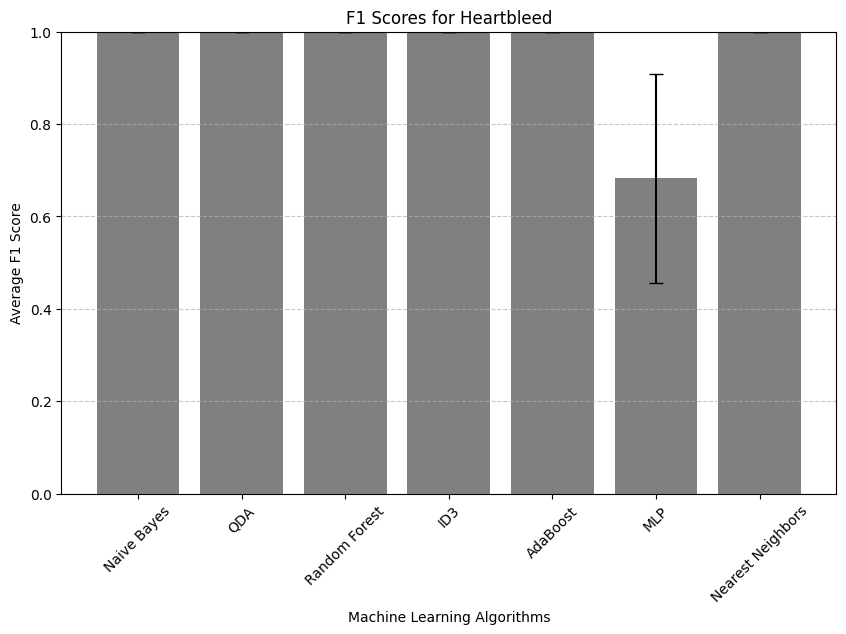


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Infiltration      Naive Bayes        0.79            0.89            0.64            0.66            0.0121         
Infiltration      QDA                0.79            0.89            0.64            0.66            0.013          
Infiltration      Random Forest      0.87            0.91            0.78            0.82            0.029          
Infiltration      ID3                0.88            0.93            0.79            0.82            0.012          
Infiltration      AdaBoost           0.88            0.93            0.79            0.82            0.1173         
Infiltration      MLP                0.51            0.4             0.53            0.41            0.0338         
Infiltration      Nearest Neighbors  0.79            0.89            0.64  

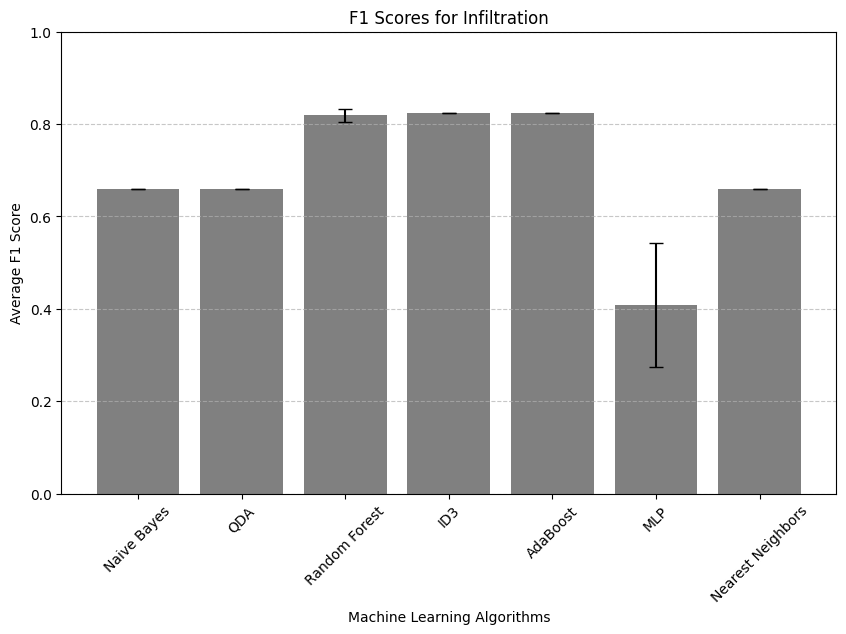


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.43            0.66            0.6             0.42            0.3216         
PortScan          QDA                0.83            0.82            0.88            0.82            0.4439         
PortScan          Random Forest      1.0             1.0             1.0             1.0             2.7986         
PortScan          ID3                1.0             1.0             1.0             1.0             1.0455         
PortScan          AdaBoost           0.99            0.99            0.99            0.99            14.0975        
PortScan          MLP                0.71            0.68            0.5             0.42            41.3349        
PortScan          Nearest Neighbors  1.0             1.0             1.0   

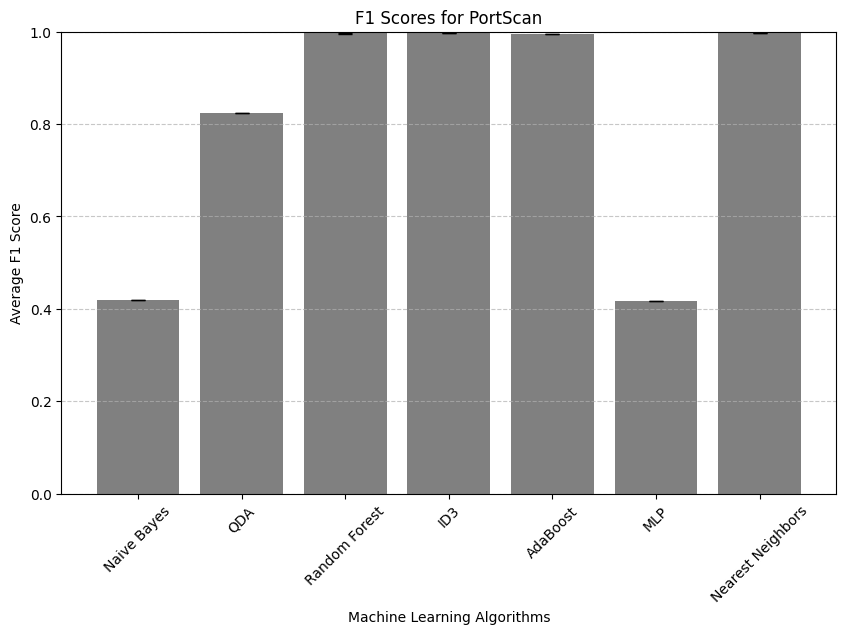


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.41            0.67            0.58            0.39            0.0197         
SSH-Patator       QDA                0.46            0.67            0.61            0.45            0.021          
SSH-Patator       Random Forest      0.96            0.95            0.97            0.95            0.1046         
SSH-Patator       ID3                0.96            0.95            0.97            0.96            0.0467         
SSH-Patator       AdaBoost           0.96            0.94            0.97            0.95            0.6679         
SSH-Patator       MLP                0.9             0.88            0.88            0.87            1.5615         
SSH-Patator       Nearest Neighbors  0.96            0.95            0.96  

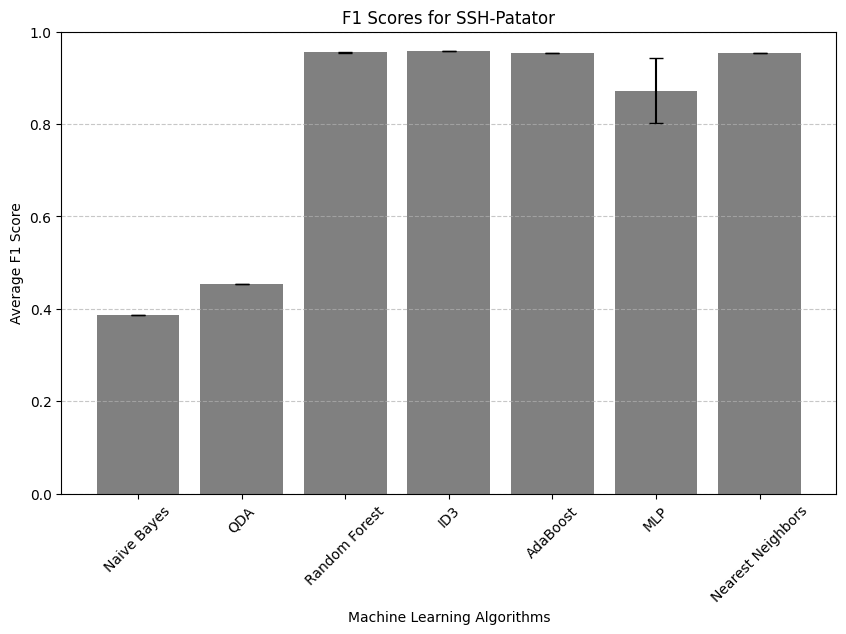


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        0.69            0.72            0.76            0.68            0.0148         
Web Attack        QDA                0.81            0.8             0.87            0.8             0.0159         
Web Attack        Random Forest      0.97            0.97            0.95            0.96            0.0575         
Web Attack        ID3                0.96            0.95            0.96            0.96            0.0237         
Web Attack        AdaBoost           0.96            0.96            0.95            0.96            0.3873         
Web Attack        MLP                0.71            0.67            0.64            0.58            0.5878         
Web Attack        Nearest Neighbors  0.93            0.91            0.94  

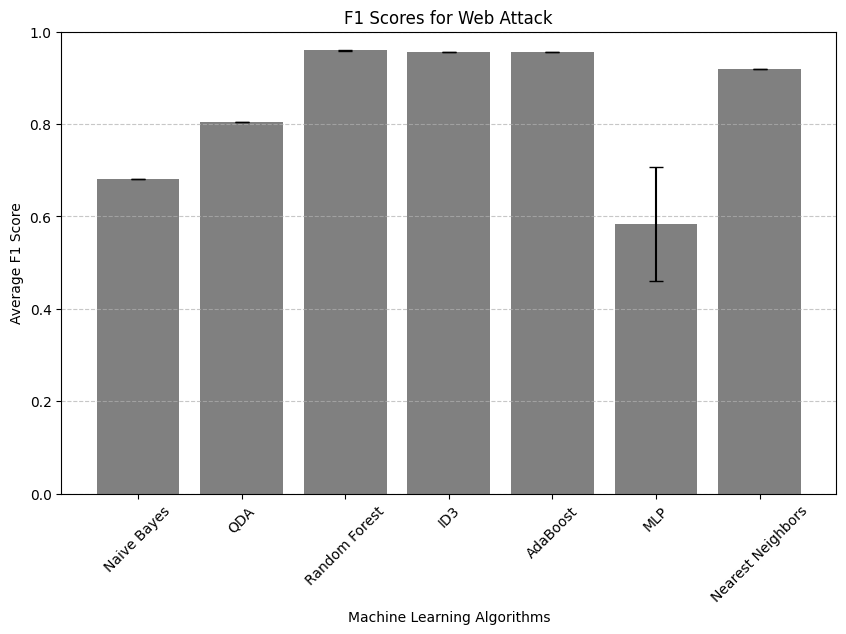


------------------------------------------------------------------------------------------------------


Total operation time: =  2899.5558092594147 seconds


In [ ]:
seconds = time.time()  # Time stamp for all processing time

# Create a CSV file to save the results
with open(result, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' %
          ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))
    a = []

    # Get feature list for the current attack file by stripping ".csv"
    attack_key = j[0:-4]
    feature_list = list(features[attack_key])

    # Read the attack file from the attacks folder
    df = pd.read_csv(os.path.join(attacks_path, j), usecols=feature_list)
    df = df.fillna(0)

    # Convert labels: 'BENIGN' to 1 and attacks to 0
    attack_or_not = []
    for i in df["Label"]:
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    # Separate data and labels
    y = df["Label"]
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    # Apply each machine learning algorithm
    for ii in ml_list:
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition):
            second = time.time()  # Start timer for current iteration

            # Perform cross-validation: split data (80% train, 20% test)
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.20, random_state=repetition)

            # Train and predict using the selected algorithm
            clf = ml_list[ii]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # Calculate performance metrics
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        # Display the averaged results for the current algorithm
        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' %
              (attack_key, ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
               str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        # Save the results in the CSV file
        with open(result, "a", newline="", encoding="utf-8") as f:
            wrt = csv.writer(f)
            for i in range(len(t_time)):
                wrt.writerow([attack_key, ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])
        a.append(f1)

    # Create bar chart with error bars for F1-scores of each ML algorithm and save as PDF
    ml_names = ["Naive Bayes", "QDA", "Random Forest", "ID3", "AdaBoost", "MLP", "Nearest Neighbors"]
    f1_means = [np.mean(scores) for scores in a]
    f1_std = [np.std(scores) for scores in a]

    plt.figure(figsize=(10, 6))
    plt.bar(ml_names, f1_means, yerr=f1_std, color="gray", capsize=5)
    plt.xlabel("Machine Learning Algorithms")
    plt.ylabel("Average F1 Score")
    plt.title(f"F1 Scores for {attack_key}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Ensure the F1 score is within the 0-1 range
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the figure as a PDF in the designated graph folder
    plt.savefig(os.path.join(graph_folder, f"{attack_key}.pdf"), bbox_inches='tight', format='pdf')
    plt.show()


    print("\n------------------------------------------------------------------------------------------------------\n\n")
print("Total operation time: = ",time.time()- seconds ,"seconds")